In [2]:
import numpy as np
import scipy.linalg as spla
import matplotlib as mpl
import matplotlib.pyplot as plt

# Putzu potentziala



Hirugarren praktika honetan putzu potentziala deritzogun potentziala aztertu dugu. Sistema honetan partikula ondoko potentzialaren menpe dago: $V(x)=-D$ baldin eta $-A<x<A$.

Unitate atomikoak eta problemaren ezaugarriak zehaztu:

In [3]:
# atomic units
hbar = 1.0
m = 1.0
# set precision of numerical approximation
steps = 2000

Ondoren  putzuaren luzera (2*W) eta altuera (D) zehaztu:

In [4]:
D = 100.0
A = 1.0
W = A / 2.0

In [5]:
# create x-vector from -A to A
xvec = np.linspace(-A, A, steps)
# get step size
h = xvec[1] - xvec[0]

Putzu potentziala Hamiltondarrean sartu beharra dago, x balio posible guztietarako definitu behar dugularik:
\begin{equation}
    \hat{H} = -\frac{\hbar}{2m^2}\nabla^2 + V(x),\hspace{0.5cm}V(x)=\begin{Bmatrix} -D & if\hspace{0.5cm}-A<x<A \\ 0 & otherwise \end{Bmatrix}
\end{equation}
Hasteko, potentziala kalkulatzen dugu:

In [6]:
def well_potential(W, x, D):
    pot = -D*(np.sign(x+W) - np.sign(x-W))
    return pot

U = well_potential(W, xvec, D)

Ondoren, Laplaziarra matrize baten moduan idatzi 'diferentzia finituak' delako metodoaz baliatuz:

\begin{equation}
f''(x)\simeq \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}
\end{equation}

In [7]:
# create Laplacian via 3 point finite-difference method
Laplacian = (-2.0*np.diag(np.ones(steps)) + \
             np.diag(np.ones(steps-1),1) + \
             np.diag(np.ones(steps-1),-1))/(float)(h**2)

In [8]:
# create the Hamiltonian
Hamiltonian = np.zeros((steps,steps))
[i,j] = np.indices(Hamiltonian.shape)
Hamiltonian[i==j] = U
Hamiltonian += (-0.5)*((hbar**2)/m)*Laplacian

Bektore (*eigenvectors*) eta balore (*eigenvalues*) propiak lortzeko Scipy-ren `eigh` funtzioa erabili:

In [9]:
def diagonalize_hamiltonian(Hamiltonian):
    return spla.eigh(Hamiltonian)

In [10]:
# diagonalize the Hamiltonian yielding the wavefunctions and energies
E, V = diagonalize_hamiltonian(Hamiltonian)

Dagoeneko metodo guztiak ditugu, beraz numerikoki lortutako emaitzak aztertuko ditugu:

In [11]:
# number of energy levels to inspect
n = 5

In [12]:
print (" lowest bound state energies:")
for i in range(n):
    print ('E(%g) = %.2f'%(i+1,E[i]))

 lowest bound state energies:
E(1) = -195.93
E(2) = -183.74
E(3) = -163.55
E(4) = -135.55
E(5) = -100.15


Text(0,0.5,'Energy / (a.u.)')

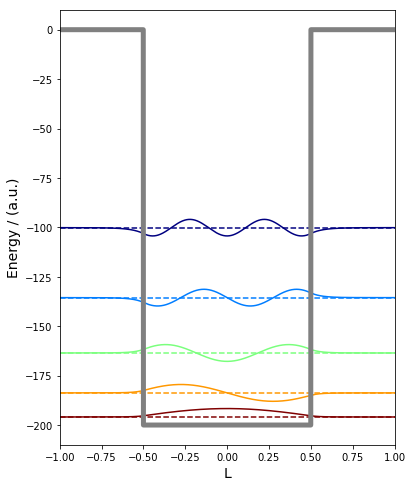

In [13]:
fig, ax = plt.subplots(figsize=(6,8))
for i, v in enumerate(V.transpose()[:n]):
    #V_new, ScaleFactor = infinite_well_plot_scaling(E,V,xvec,W)
    color=mpl.cm.jet_r((i)/(float)(n-1),1)
    ax.plot(xvec, 100*v + E[i], c=color)
    ax.axhline(E[i], c=color, ls='--')
ax.plot(xvec, U, c='gray', lw=5)
ax.set_xlim(xvec[0], xvec[-1])
#x.set_ylim(-E[0], E[n])
ax.set_xlabel('L', fontsize=14)
# set y label
ax.set_ylabel('Energy / (a.u.)', fontsize=14)

1. Briefly explain how this case differs from the previous cases.
2. How many bound energy levels are capable of existing in the finite potential energy
well if force constant = 0.6 and D = 10 a.u.? Include a plot of your results.
3. Are the wavefunctions permitted to exist outside the harmonic potential energy well?
If so, what is this phenomenon called? Provide a brief description of the phenomenon.
4. When W = 0.8 a.u. and D = 6 a.u., what is the energy of the 5th bound wavefunction? Include a plot of your results.
5. Try two additional sets of inputs for case 5 and include the plots in your write-up. Be sure to explain what variable(s) was/were changed and the significance they had on the results.
6. For the 2 additional sets of inputs, also include a plot of the probability density for each. Provide an explanation of how this probability density differs from the plots in question #5 above.